# summary results for 8 problems

# Library

In [1]:
import pandas as pd
import numpy as np
#
# from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Crying Baby

runtime is the sum of 100 simulations, each simulation contains 1000 games

In [2]:
df = pd.read_table("cryingBabyProblem.csv",sep=',')

cm = sns.light_palette("orange", as_cmap=True)
df2 = df.groupby(["package"]).sum().round(4)
df2 = df2[[i for i in df2.columns if i not in ['id']]]
df2.style.format('{:.4f}').background_gradient(cmap=cm).apply(
    lambda col: ['font-weight:bold' 
                 if ((x==col.max() and col.name in ["sum_reward","sum_discount_reward"
                     ]) 
                     or (x==col.min() and col.name in ["avg_steps","runtime"]))
                 else '' 
                 for x in col])

,n_games,sum_reward,sum_discount_reward,avg_steps_per_game,runtime
package,,,,,
FIB,10000.0000,-240370.0000,-195.0000,134.0340,0.1379
PBVI,10000.0000,-246160.0000,-143.0000,136.4570,0.8480
POMCP,10000.0000,-89395.0000,-203.0000,31.8510,41.5183
POMCPOW,10000.0000,-147285.0000,-186.0000,61.4470,54.1477
QMDP,10000.0000,-241160.0000,-129.0000,133.7930,0.1473
SARSOP,10000.0000,-252035.0000,-134.0000,136.4770,0.2715


In [3]:
baby_runtime = df2["runtime"]
print(baby_runtime)

baby_sum_discounted = df2["sum_discount_reward"]
print(baby_sum_discounted)

package
FIB         0.1379
PBVI        0.8480
POMCP      41.5183
POMCPOW    54.1477
QMDP        0.1473
SARSOP      0.2715
Name: runtime, dtype: float64
package
FIB       -195
PBVI      -143
POMCP     -203
POMCPOW   -186
QMDP      -129
SARSOP    -134
Name: sum_discount_reward, dtype: int64


## Tiger

runtime is the sum of 100 simulations, each simulation contains 1000 games

In [4]:
df = pd.read_table("tigerProblem.csv",sep=',')

cm = sns.light_palette("orange", as_cmap=True)
df2 = df.groupby(["package"]).sum().round(4)
df2 = df2[[i for i in df2.columns if i not in ['id']]]
df2.style.format('{:.4f}').background_gradient(cmap=cm).apply(
    lambda col: ['font-weight:bold' 
                 if ((x==col.max() and col.name in [
                     "sum_reward","sum_discount_reward"
                     ]) 
                     or (x==col.min() and col.name in ["avg_steps","runtime"]))
                 else '' 
                 for x in col])

,n_games,sum_reward,sum_discount_reward,avg_steps_per_game,runtime
package,,,,,
FIB,10000.0000,41682.0000,246.0000,36.9680,0.1696
PBVI,10000.0000,38816.0000,319.0000,36.7540,0.2243
POMCP,10000.0000,-335650.0000,-3728.0000,18.9600,2.4639
POMCPOW,10000.0000,-350694.0000,-3287.0000,18.4940,4.6273
QMDP,10000.0000,41614.0000,259.0000,36.9260,0.1462
SARSOP,10000.0000,36916.0000,343.0000,36.7840,0.0945


In [5]:
tiger_runtime = df2["runtime"]
print(tiger_runtime)

tiger_sum_discounted = df2["sum_discount_reward"]
print(tiger_sum_discounted)

package
FIB        0.1696
PBVI       0.2243
POMCP      2.4639
POMCPOW    4.6273
QMDP       0.1462
SARSOP     0.0945
Name: runtime, dtype: float64
package
FIB         246
PBVI        319
POMCP     -3728
POMCPOW   -3287
QMDP        259
SARSOP      343
Name: sum_discount_reward, dtype: int64


## Paint
runtime is the sum of 100 simulations, each simulation contains 1000 games

In [6]:
df = pd.read_table("paintProblem.csv",sep=',')

cm = sns.light_palette("orange", as_cmap=True)
df2 = df.groupby(["package"]).sum().round(4)
df2 = df2[[i for i in df2.columns if i not in ['id']]]
df2.style.format('{:.4f}').background_gradient(cmap=cm).apply(
    lambda col: ['font-weight:bold' 
                 if ((x==col.max() and col.name in [
                     "sum_reward","sum_discount_reward"
                     ]) 
                     or (x==col.min() and col.name in ["avg_steps","runtime"]))
                 else '' 
                 for x in col])

,n_games,sum_reward,sum_discount_reward,avg_steps_per_game,runtime
package,,,,,
FIB,10000.0000,-62.0000,-5.0000,20.0620,0.6708
PBVI,10000.0000,83.0000,6.0000,19.9170,1.0256
POMCP,10000.0000,-8770.0000,-71.0000,28.7700,163.7283
POMCPOW,10000.0000,-11179.0000,-78.0000,31.1790,854.3404
QMDP,10000.0000,-170.0000,-1.0000,20.1700,0.1474
SARSOP,10000.0000,-184.0000,1.0000,20.1840,1.3607


In [7]:
paint_runtime = df2["runtime"]
print(paint_runtime)

paint_sum_discounted = df2["sum_discount_reward"]
print(paint_sum_discounted)

package
FIB          0.6708
PBVI         1.0256
POMCP      163.7283
POMCPOW    854.3404
QMDP         0.1474
SARSOP       1.3607
Name: runtime, dtype: float64
package
FIB        -5
PBVI        6
POMCP     -71
POMCPOW   -78
QMDP       -1
SARSOP      1
Name: sum_discount_reward, dtype: int64


## Rock Sample

runtime is the sum of 100 simulations, each simulation contains 1000 games

In [8]:
df = pd.read_table("rockSampleProblem.csv",sep=',')

cm = sns.light_palette("orange", as_cmap=True)
df2 = df.groupby(["package"]).sum().round(4)
df2 = df2[[i for i in df2.columns if i not in ['id']]]
df2.style.format('{:.4f}').background_gradient(cmap=cm).apply(
    lambda col: ['font-weight:bold' 
                 if ((x==col.max() and col.name in [
                     "sum_reward","sum_discount_reward"
                     ]) 
                     or (x==col.min() and col.name in ["avg_steps","runtime"]))
                 else '' 
                 for x in col])

,n_games,sum_reward,sum_discount_reward,avg_steps_per_game,runtime
package,,,,,
FIB,10000.0000,0.0000,0.0000,1000.0100,10.5323
PBVI,10000.0000,281280.0000,673.0000,70.1280,9.0112
POMCP,10000.0000,197845.0000,686.0000,49.4370,39.9139
POMCPOW,10000.0000,196635.0000,689.0000,50.1790,51.4488
QMDP,10000.0000,0.0000,0.0000,1000.0100,8.1730
SARSOP,10000.0000,279740.0000,666.0000,69.9740,1.4186


In [9]:
rock_runtime = df2["runtime"]
print(rock_runtime)

rock_sum_discounted = df2["sum_discount_reward"]
print(rock_sum_discounted)

package
FIB        10.5323
PBVI        9.0112
POMCP      39.9139
POMCPOW    51.4488
QMDP        8.1730
SARSOP      1.4186
Name: runtime, dtype: float64
package
FIB          0
PBVI       673
POMCP      686
POMCPOW    689
QMDP         0
SARSOP     666
Name: sum_discount_reward, dtype: int64


## Query

In [10]:
df = pd.read_table("queryProblem.csv",sep=',')

cm = sns.light_palette("orange", as_cmap=True)
df2 = df.groupby(["package"]).sum().round(4)
df2 = df2[[i for i in df2.columns if i not in ['id']]]
df2.style.format('{:.4f}').background_gradient(cmap=cm).apply(
    lambda col: ['font-weight:bold' 
                 if ((x==col.max() and col.name in [
                     "sum_reward","sum_discount_reward"
                     ]) 
                     or (x==col.min() and col.name in ["avg_steps","runtime"]))
                 else '' 
                 for x in col])

,n_games,sum_reward,sum_discount_reward,avg_steps_per_game,runtime
package,,,,,
FIB,10000.0000,240894.0000,1006.0000,48.0670,3.2687
PBVI,10000.0000,247111.0000,968.0000,48.9540,4.1462
POMCP,10000.0000,177817.0000,823.0000,39.9120,21.2684
POMCPOW,10000.0000,203659.0000,786.0000,43.9550,69.6085
QMDP,10000.0000,248407.0000,958.0000,49.4770,2.3331
SARSOP,10000.0000,251306.0000,982.0000,50.0140,2.4465


In [11]:
query_runtime = df2["runtime"]
print(query_runtime)

query_sum_discounted = df2["sum_discount_reward"]
print(query_sum_discounted)

package
FIB         3.2687
PBVI        4.1462
POMCP      21.2684
POMCPOW    69.6085
QMDP        2.3331
SARSOP      2.4465
Name: runtime, dtype: float64
package
FIB        1006
PBVI        968
POMCP       823
POMCPOW     786
QMDP        958
SARSOP      982
Name: sum_discount_reward, dtype: int64


## Mini hallway

Some error for problem setup

In [12]:
df = pd.read_table("miniHallwayProblem.csv",sep=',')

cm = sns.light_palette("orange", as_cmap=True)
df2 = df.groupby(["package"]).sum().round(4)
df2 = df2[[i for i in df2.columns if i not in ['id']]]
df2.style.format('{:.4f}').background_gradient(cmap=cm).apply(
    lambda col: ['font-weight:bold' 
                 if ((x==col.max() and col.name in [
                     "sum_reward","sum_discount_reward"
                     ]) 
                     or (x==col.min() and col.name in ["avg_steps","runtime"]))
                 else '' 
                 for x in col])

,n_games,sum_reward,sum_discount_reward,avg_steps_per_game,runtime
package,,,,,
FIB,10000.0000,3392.0000,1.0000,684.5940,15.4307
PBVI,10000.0000,10000.0000,22.0000,65.8830,1.8702
POMCP,10000.0000,9998.0000,4.0000,162.5320,116.7012
POMCPOW,10000.0000,9998.0000,4.0000,170.6100,132.4910
QMDP,10000.0000,3258.0000,0.0000,697.0300,8.5316
SARSOP,10000.0000,10000.0000,20.0000,65.6720,1.3364


In [13]:
miniHallway_runtime = df2["runtime"]
print(miniHallway_runtime)

miniHallway_sum_discounted = df2["sum_discount_reward"]
print(miniHallway_sum_discounted)

package
FIB         15.4307
PBVI         1.8702
POMCP      116.7012
POMCPOW    132.4910
QMDP         8.5316
SARSOP       1.3364
Name: runtime, dtype: float64
package
FIB         1
PBVI       22
POMCP       4
POMCPOW     4
QMDP        0
SARSOP     20
Name: sum_discount_reward, dtype: int64


In [14]:
miniHallway_runtime = df2["runtime"]
print(miniHallway_runtime)

miniHallway_sum_discounted = df2["sum_discount_reward"]
print(miniHallway_sum_discounted)

package
FIB         15.4307
PBVI         1.8702
POMCP      116.7012
POMCPOW    132.4910
QMDP         8.5316
SARSOP       1.3364
Name: runtime, dtype: float64
package
FIB         1
PBVI       22
POMCP       4
POMCPOW     4
QMDP        0
SARSOP     20
Name: sum_discount_reward, dtype: int64


## T-Maze problem (arm length =3)

In [15]:
df = pd.read_table("tMazeProblem.csv",sep=',')

cm = sns.light_palette("orange", as_cmap=True)
df2 = df.groupby(["package"]).sum().round(4)
df2 = df2[[i for i in df2.columns if i not in ['id']]]
df2.style.format('{:.4f}').background_gradient(cmap=cm).apply(
    lambda col: ['font-weight:bold' 
                 if ((x==col.max() and col.name in [
                     "sum_reward","sum_discount_reward"
                     ]) 
                     or (x==col.min() and col.name in ["avg_steps","runtime"]))
                 else '' 
                 for x in col])

,n_games,sum_reward,sum_discount_reward,avg_steps_per_game,runtime
package,,,,,
FIB,10000.0000,-87.0000,0.0000,1000.0100,7.1363
PBVI,10000.0000,19038.0000,299.0000,80.5230,1.0194
POMCP,10000.0000,18296.0000,162.0000,94.2510,3648.0549
POMCPOW,10000.0000,15410.0000,99.0000,120.0860,6251.3235
QMDP,10000.0000,-82570.0000,-86.0000,911.9100,5.8714
SARSOP,10000.0000,34854.0000,247.0000,135.3020,2.7433


In [16]:
tMaze_runtime = df2["runtime"]
print(tMaze_runtime)

tMaze_sum_discounted = df2["sum_discount_reward"]
print(tMaze_sum_discounted)

package
FIB           7.1363
PBVI          1.0194
POMCP      3648.0549
POMCPOW    6251.3235
QMDP          5.8714
SARSOP        2.7433
Name: runtime, dtype: float64
package
FIB          0
PBVI       299
POMCP      162
POMCPOW     99
QMDP       -86
SARSOP     247
Name: sum_discount_reward, dtype: int64


# Summary

## Runtime

In [17]:
concatenated1 = pd.concat([baby_runtime, tiger_runtime, paint_runtime, 
                           rock_runtime, query_runtime, miniHallway_runtime, 
                           tMaze_runtime
                           ], axis=1)
concatenated1.columns.values[0] = 'Crying Baby'
concatenated1.columns.values[1] = 'Tiger'
concatenated1.columns.values[2] = 'Paint'
concatenated1.columns.values[3] = 'Rock Sample'
concatenated1.columns.values[4] = 'Query'
concatenated1.columns.values[5] = 'Mini Hallway'
concatenated1.columns.values[6] = 'T-Maze'
# sort by package name
custom_order = {'IP':0, 'QMDP':1,'FIB':2,'PBVI':3,
                'SARSOP':4,'POMCP':5,'POMCPOW':6}
concatenated1 =concatenated1.sort_values(by=['package'], key=lambda x: x.map(custom_order))
# color coded
concatenated1.style.format('{:.4f}').background_gradient(axis=0,cmap="Pastel2").apply(
    lambda col: ['font-weight:bold' if x==col.min() else ''
                 for x in col])

,Crying Baby,Tiger,Paint,Rock Sample,Query,Mini Hallway,T-Maze
package,,,,,,,
QMDP,0.1473,0.1462,0.1474,8.1730,2.3331,8.5316,5.8714
FIB,0.1379,0.1696,0.6708,10.5323,3.2687,15.4307,7.1363
PBVI,0.8480,0.2243,1.0256,9.0112,4.1462,1.8702,1.0194
SARSOP,0.2715,0.0945,1.3607,1.4186,2.4465,1.3364,2.7433
POMCP,41.5183,2.4639,163.7283,39.9139,21.2684,116.7012,3648.0549
POMCPOW,54.1477,4.6273,854.3404,51.4488,69.6085,132.4910,6251.3235


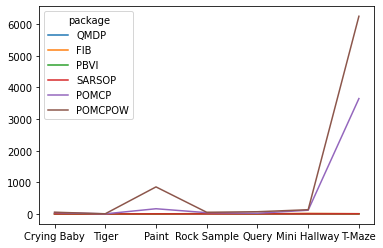

In [18]:
lines = concatenated1.T.plot.line()

In [19]:
# lines.figure.savefig('summary_runtime.png')

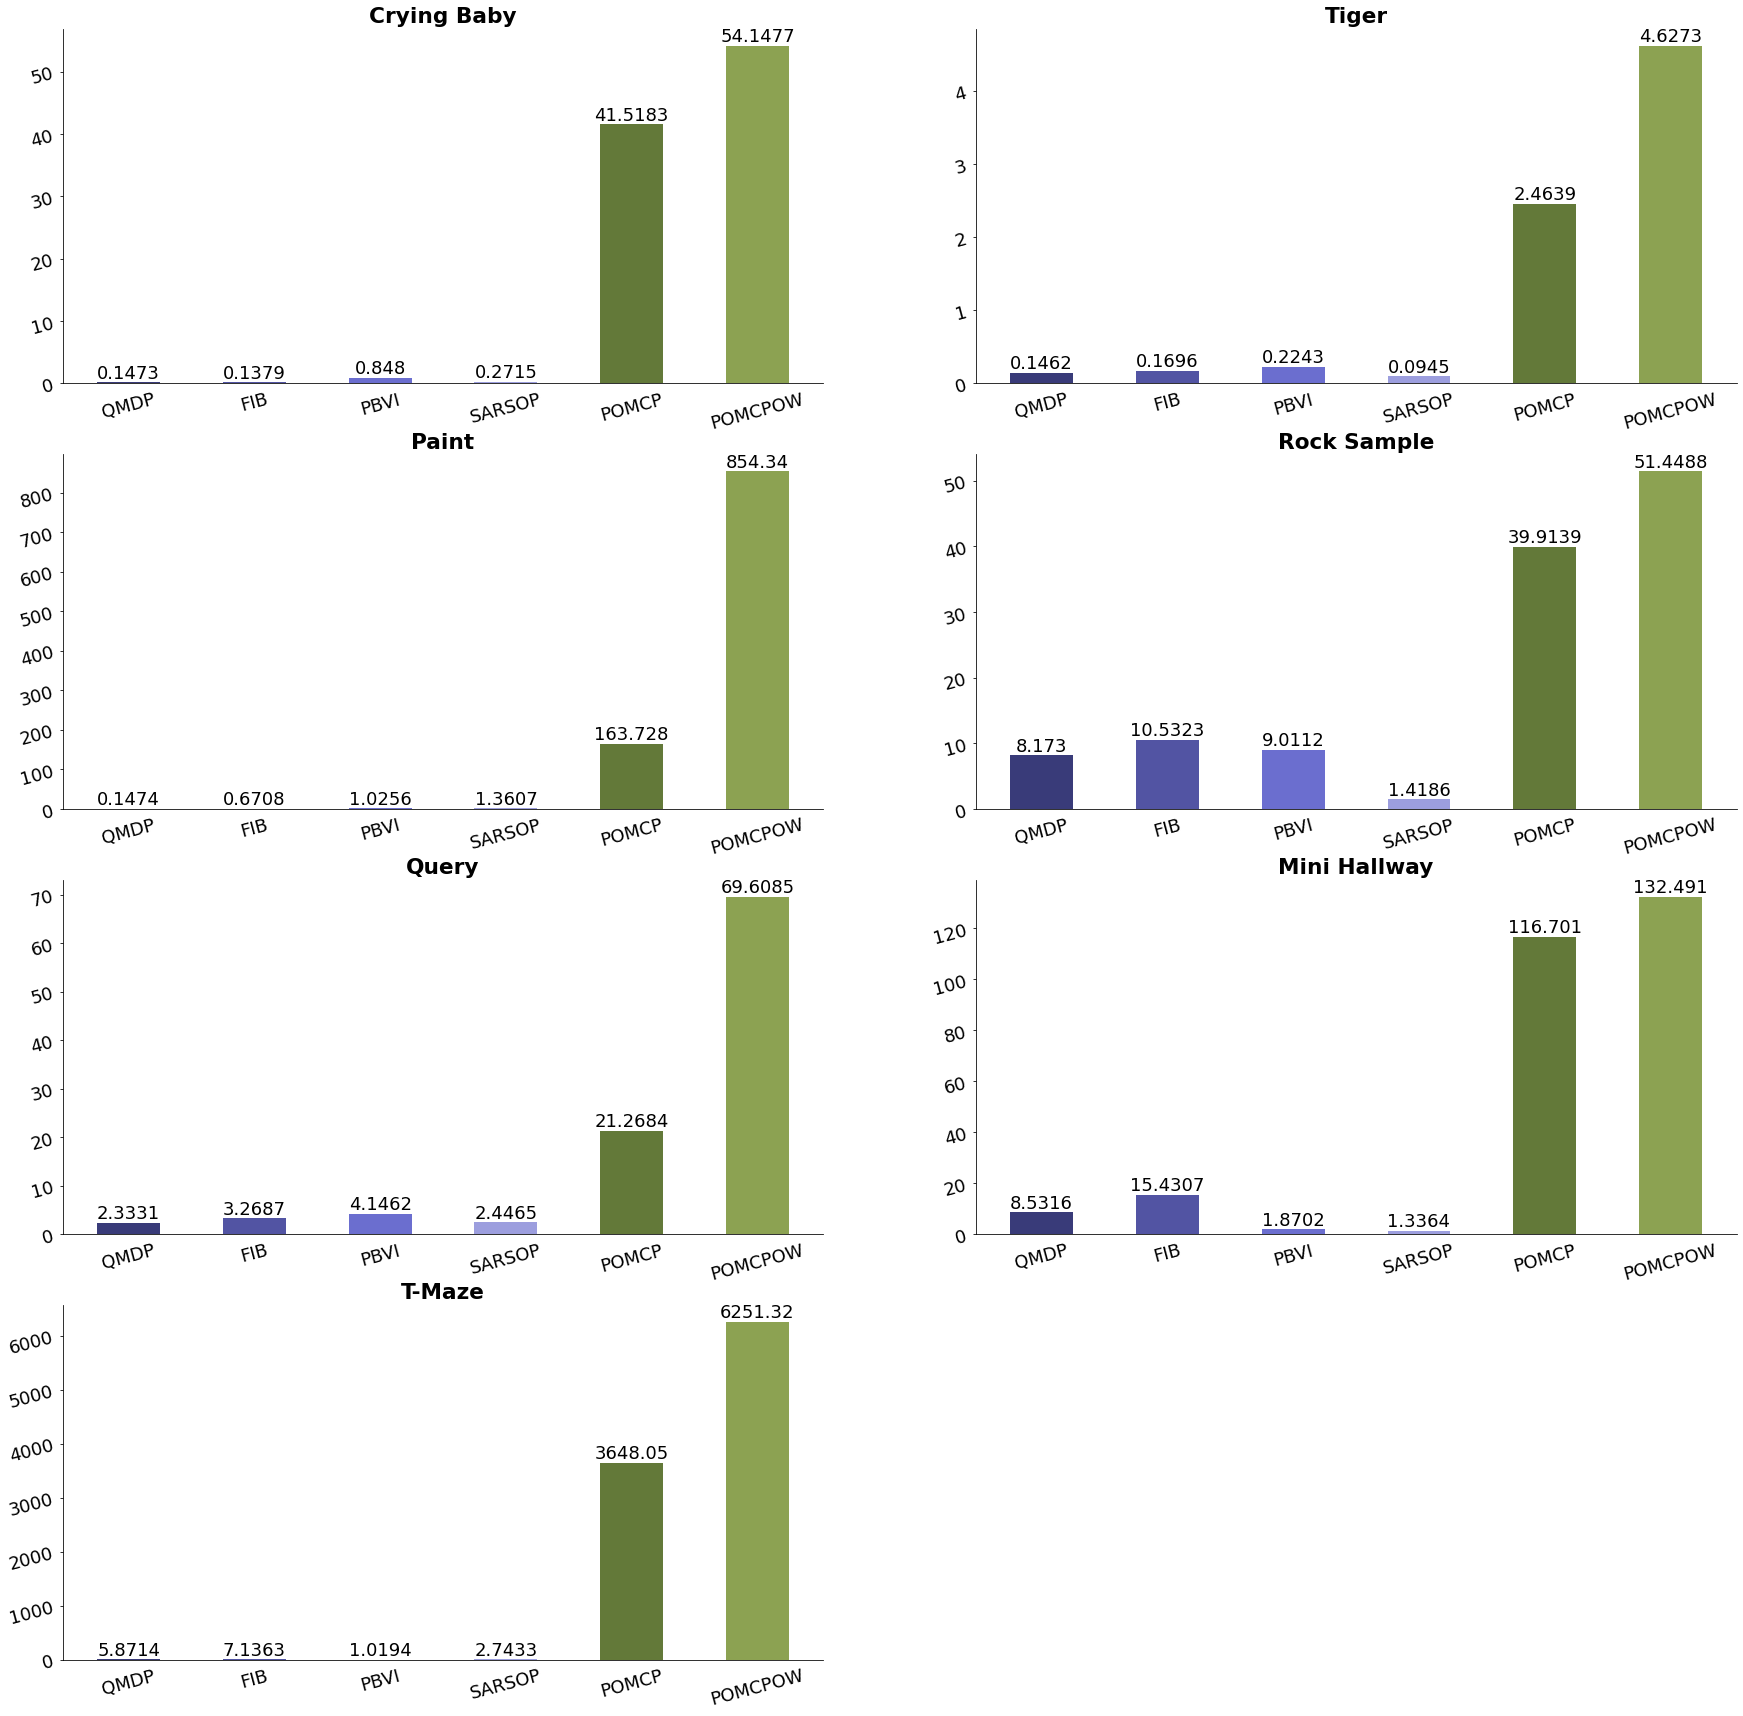

In [72]:
col_j = 0
row_i = 0
figure, axis = plt.subplots(4, 2,figsize=(30, 30))
plt.rcParams['font.size'] = 18

for i, rows in concatenated1.T.iterrows():
    #print(rows.index, rows.values)
    ax = axis[row_i, col_j]
    
    colors = plt.cm.tab20b(np.arange(len(rows)))
    p = ax.bar(rows.index,rows.values, color =colors, width=0.5)
    ax.bar_label(p) 
    ax.set_title(i, fontweight='bold')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_facecolor("None")
    ax.tick_params(labelrotation=15, bottom=False)
    
    if col_j ==1:
        row_i +=1
        col_j =0
    else:
        col_j +=1

plt.delaxes(axis[3, 1])
plt.savefig('summary_runtime.png',bbox_inches='tight')    
plt.show()

#concatenated1.plot.bar()

## Discounted Reward

In [33]:
concatenated2 = pd.concat([ baby_sum_discounted, tiger_sum_discounted, paint_sum_discounted, 
                           rock_sum_discounted, query_sum_discounted, miniHallway_sum_discounted, 
                           tMaze_sum_discounted], axis=1)
concatenated2.columns.values[0] = 'Crying Baby'
concatenated2.columns.values[1] = 'Tiger'
concatenated2.columns.values[2] = 'Paint'
concatenated2.columns.values[3] = 'Rock Sample'
concatenated2.columns.values[4] = 'Query'
concatenated2.columns.values[5] = 'Mini Hallway'
concatenated2.columns.values[6] = 'T-Maze'
custom_order = {'IP':0, 'QMDP':1,'FIB':2,'PBVI':3,
                'SARSOP':4,'POMCP':5,'POMCPOW':6}
concatenated2 =concatenated2.sort_values(by=['package'], key=lambda x: x.map(custom_order))

concatenated2.style.format('{:.4f}').background_gradient(axis=0,cmap="Pastel1").apply(
    lambda col: ['font-weight:bold' if x==col.max() else ''
                 for x in col])

,Crying Baby,Tiger,Paint,Rock Sample,Query,Mini Hallway,T-Maze
package,,,,,,,
QMDP,-129.0000,259.0000,-1.0000,0.0000,958.0000,0.0000,-86.0000
FIB,-195.0000,246.0000,-5.0000,0.0000,1006.0000,1.0000,0.0000
PBVI,-143.0000,319.0000,6.0000,673.0000,968.0000,22.0000,299.0000
SARSOP,-134.0000,343.0000,1.0000,666.0000,982.0000,20.0000,247.0000
POMCP,-203.0000,-3728.0000,-71.0000,686.0000,823.0000,4.0000,162.0000
POMCPOW,-186.0000,-3287.0000,-78.0000,689.0000,786.0000,4.0000,99.0000


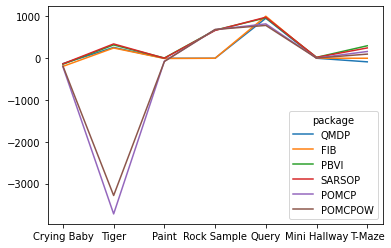

In [34]:
lines = concatenated2.T.plot.line()

In [35]:
# lines.figure.savefig('summary_reward.png')

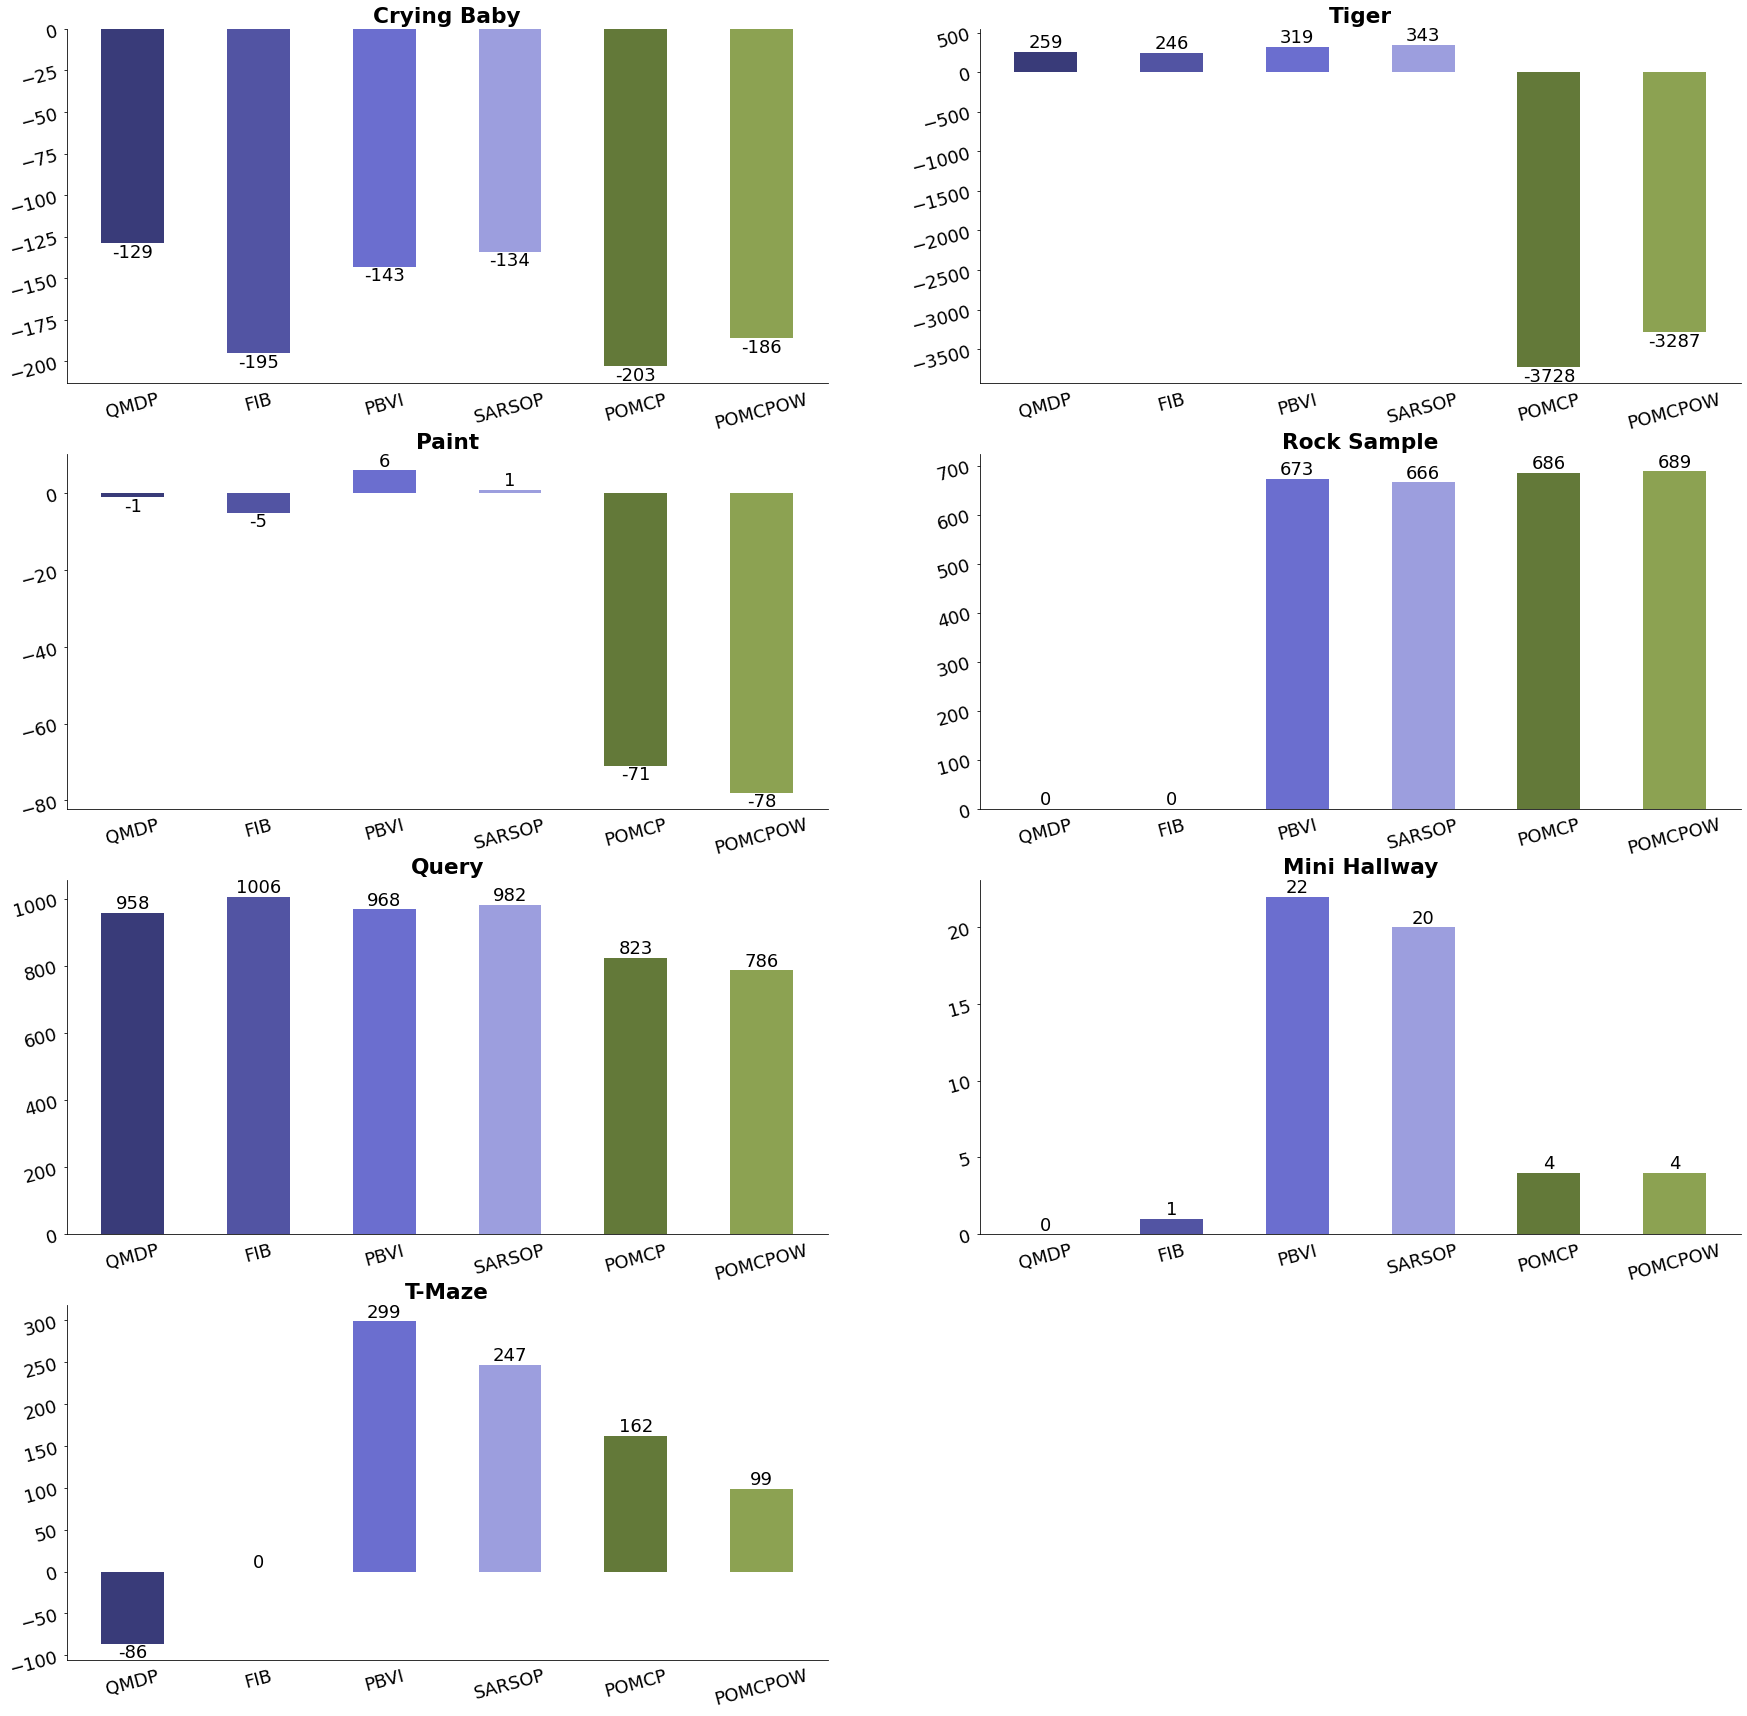

In [73]:
col_j = 0
row_i = 0
figure, axis =plt.subplots(4, 2,figsize=(30, 30))
plt.rcParams['font.size'] = 18

for i, rows in concatenated2.T.iterrows():
    #print(rows.index, rows.values)
    ax = axis[row_i, col_j]
    
    colors = plt.cm.tab20b(np.arange(len(rows)))
    p = ax.bar(rows.index,rows.values, color =colors, width=0.5)
    ax.bar_label(p) 
    ax.set_title(i, fontweight='bold')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_facecolor("None")
    ax.tick_params(labelrotation=15, bottom=False)
    
    
    if col_j ==1:
        row_i +=1
        col_j =0
    else:
        col_j +=1

plt.delaxes(axis[3, 1])
plt.savefig('summary_reward.png', bbox_inches='tight')    
plt.show()

#concatenated1.plot.bar()

# summary
simply combine above 2 matrix together

In [37]:
runtime_list = [('Runtime','Crying Baby'), ('Runtime','Tiger'), 
               ('Runtime','Paint'), ('Runtime','Rock Sample'),
               ('Runtime','Query'), ('Runtime','Mini Hallway'),
               ('Runtime','T-Maze')]
reward_list = [('Reward','Crying Baby'), ('Reward','Tiger'), 
               ('Reward','Paint'), ('Reward','Rock Sample'),
               ('Reward','Query'), ('Reward','Mini Hallway'),
               ('Reward','T-Maze')]
y =  reward_list + runtime_list
s =  pd.concat([concatenated2,concatenated1], axis=1)
s.columns = pd.MultiIndex.from_tuples(y)

s.style.format('{:.4f}').apply(
    lambda col: ['font-weight:bold' if (
         (x==col.min()and col.name in runtime_list) or
         (x==col.max() and col.name in reward_list)) else ''
                 for x in col])

custom_order = {'IP':0, 'QMDP':1,'FIB':2,'PBVI':3,
                'SARSOP':4,'POMCP':5,'POMCPOW':6}
s=s.sort_values(by=['package'], key=lambda x: x.map(custom_order))
s.T.to_csv("summary.csv")
s.T

package                   QMDP        FIB      PBVI    SARSOP      POMCP  \
Reward  Crying Baby  -129.0000  -195.0000 -143.0000 -134.0000  -203.0000   
        Tiger         259.0000   246.0000  319.0000  343.0000 -3728.0000   
        Paint          -1.0000    -5.0000    6.0000    1.0000   -71.0000   
        Rock Sample     0.0000     0.0000  673.0000  666.0000   686.0000   
        Query         958.0000  1006.0000  968.0000  982.0000   823.0000   
        Mini Hallway    0.0000     1.0000   22.0000   20.0000     4.0000   
        T-Maze        -86.0000     0.0000  299.0000  247.0000   162.0000   
Runtime Crying Baby     0.1473     0.1379    0.8480    0.2715    41.5183   
        Tiger           0.1462     0.1696    0.2243    0.0945     2.4639   
        Paint           0.1474     0.6708    1.0256    1.3607   163.7283   
        Rock Sample     8.1730    10.5323    9.0112    1.4186    39.9139   
        Query           2.3331     3.2687    4.1462    2.4465    21.2684   
        Mini Hallway    8.5316    15.4307    1.8702    1.3364   116.7012   
        T-Maze          5.8714     7.1363    1.0194    2.7433  3648.0549   

package                 POMCPOW  
Reward  Crying Baby   -186.0000  
        Tiger        -3287.0000  
        Paint          -78.0000  
        Rock Sample    689.0000  
        Query          786.0000  
        Mini Hallway     4.0000  
        T-Maze          99.0000  
Runtime Crying Baby     54.1477  
        Tiger            4.6273  
        Paint          854.3404  
        Rock Sample     51.4488  
        Query           69.6085  
        Mini Hallway   132.4910  
        T-Maze        6251.3235